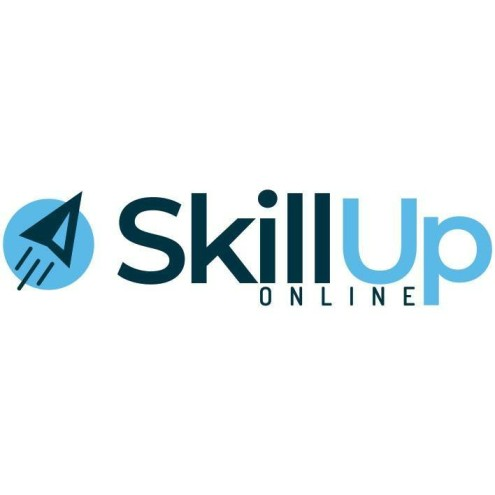

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importa y organiza el dataset

In [2]:
# Organizamos los datos en un dataframe
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

In [17]:
# Vemos si hay valores perdidos
valores_perdidos=df.isnull().sum()
sum(valores_perdidos)

0

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [5]:
# Vemos si hay datos duplicados
df.duplicated().sum()

1081

In [6]:
# Eliminamos los duplicados
df=df.drop_duplicates()

In [7]:
# Comprobamos que no hay duplicados
df.duplicated().sum()

0

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [8]:
# La columna Class nos indica con un 0 si no es fraudulenta y con un 1 si sí lo es
porcentaje_fraud = (df['Class'].sum() / len(df)) * 100

print(f"El porcentaje de transacciones fraudulentas es igual a {porcentaje_fraud:.2f}%")

El porcentaje de transacciones fraudulentas es igual a 0.17%


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [9]:
importe_medio = df[df['Class'] == 1]['Amount'].mean()

print(f"El importe medio de las transacciones fraudulentas es igual a {importe_medio:.2f}€")

El importe medio de las transacciones fraudulentas es igual a 123.87€


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

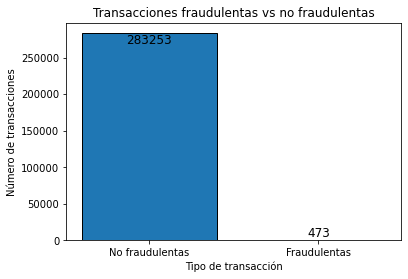

In [10]:
# Calculamos las frecuencias de 0 y 1
frecuencias = df['Class'].value_counts()

plt.bar(['No fraudulentas', 'Fraudulentas'], frecuencias,edgecolor='black')
plt.text(0, frecuencias[0] + 0.5, str(frecuencias[0]), ha='center', va='top', fontsize=12)
plt.text(1, frecuencias[1] + 0.5, str(frecuencias[1]), ha='center', va='bottom', fontsize=12)
plt.xlabel('Tipo de transacción')
plt.ylabel('Número de transacciones')
plt.title('Transacciones fraudulentas vs no fraudulentas')
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


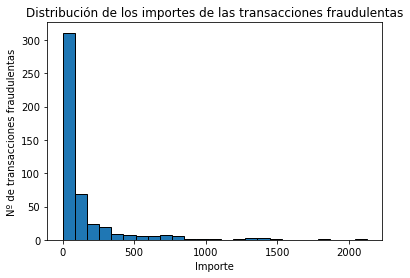

In [11]:
# Tomamos la serie de importes de las transacciones fraudulentas
importe_fraud=df[df['Class'] == 1]['Amount']

plt.hist(importe_fraud, bins=25,edgecolor='black')
plt.title("Distribución de los importes de las transacciones fraudulentas")
plt.xlabel("Importe")
plt.ylabel("Nº de transacciones fraudulentas")
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Class', axis=1)
y = df.Class

# Separamos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [13]:
# Podemos ver las cinco primeras filas del conjunto de entrenamiento
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
35945,38328.0,-2.284018,0.128321,0.334689,-1.359770,-1.609372,-0.622445,-1.296457,1.405526,-0.796422,...,-0.403828,0.368037,0.629887,-0.254247,0.078130,-0.278952,-0.325030,-0.121266,-0.186299,58.38
161108,113879.0,1.899850,0.373327,0.060414,3.733643,0.112268,0.708780,-0.467731,0.127588,-0.469066,...,-0.187228,0.202660,0.740806,0.167688,0.676636,-0.101833,0.041278,0.016479,-0.025704,0.00
255771,157392.0,2.375973,-1.033563,-1.682498,-1.763908,-0.485651,-0.968454,-0.470792,-0.475715,-1.863160,...,-0.346524,-0.339464,-0.506061,0.191091,-0.789693,-0.055322,-0.267015,-0.013905,-0.062126,20.00
118052,74931.0,-0.816465,1.218363,0.884780,0.085678,-0.039396,-0.587541,0.298196,0.474597,-0.619708,...,0.054912,-0.172556,-0.567326,0.098464,0.030696,-0.192703,0.101376,0.135943,0.018448,17.99
256632,157783.0,2.074398,-1.200238,-1.003405,-1.159699,-0.473629,0.497460,-1.067173,0.123268,-0.152889,...,0.175708,0.356062,0.948192,0.001081,-0.156149,-0.063801,-0.089064,-0.003919,-0.049640,69.00


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Creamos el modelo
rf_model = RandomForestClassifier(max_depth=150, random_state=42)
#Entrenamos el modelo
rf_model.fit(X_train, y_train)
# Hacemos las predicciones
y_pred = rf_model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

print("\nResumen del rendimiento del modelo:")
print()
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)*100
print(f"La exactitud general del modelo con los datos de evaluación es {accuracy:.2f}%")


Resumen del rendimiento del modelo:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56654
           1       0.96      0.73      0.83        92

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

La exactitud general del modelo con los datos de evaluación es 99.95%


In [16]:
# matriz de confusión
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Es fraudulenta', 'No es fraudulenta'],columns=['Predicción fraudulenta','Predicción no fraudulenta'])

print("\nVemos que se han tomado como fraudulentas 3 transacciones cuando no lo eran, y que se han tomado como no fraudulentas \n 25 transacciones cuando sí eran fraudulentas.")
confusion


Vemos que se han tomado como fraudulentas 3 transacciones cuando no lo eran, y que se han tomado como no fraudulentas 
 25 transacciones cuando sí eran fraudulentas.


,Predicción fraudulenta,Predicción no fraudulenta
Es fraudulenta,67,25
No es fraudulenta,3,56651


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>